Перед нами данные до 2016 года интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
#сохраним датасет в переменную
data=pd.read_csv('/Users/juliagrebeneva/Downloads/Яндекс учеба/Сборный проект-1/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы имеем датасет из 16715 строк и 11 столбцов. Есть пропуски в столцах Name, Year_of_Release, Genre, Critic_Score, User_Score,Rating. Для некоторых столбов неподходящие типы данных. 

### Подготовка данных

#### Сначала приведем таблицу к читабельному виду. Преобразуем названия столбов. 

In [5]:
data.columns=data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изменим тип данных для некоторых столбов

year_of_release в int, так как нет больше никакой информации в этой строке, кроме года, поэтому можем использовать числовой тип; 

user_score в float, так как это оценка пользователя, то должен быть числовой тип данных, а именно float, так оценка не всегда целое число;

Остальные столбы оставим без изменений.

In [6]:
#смотрим какие уникальные значения есть в столбце с годом выпуска игры
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Так как есть пропуски, то столбец не примет тип int. Поэтому сначала удалим строки с пропущенными значениями (их 1,6% от всего датасета). Далее заменим тип данных на int. 

In [7]:
# удаляем строки с пропущенными значениями
data=data.dropna(subset=['year_of_release']).reset_index(drop=True)
#меняем тип данных
data['year_of_release']=data['year_of_release'].astype('int')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце с оценкой пользователя есть строчки со значениями tbd, это абревиатура значит - будет определено, т.е. оценка ещё не стоит. Удалять эти строки мы не будем. Мы поставим вместо них число 20 - заглушку. Максимум в этом столбце будет 10, поэтому такая заглушка никак не повлияет сейчас на датасет. В дальнейшем, если решим что-то сделать с этими строками, будем иметь ввиду что стоит заглушка.

In [10]:
#считаем сколько таких строк
len(data.loc[data['user_score']== 'tbd'])

2376

In [11]:
# меняем значения tqd на заглушку со значением 20
data.loc[data['user_score']== 'tbd', 'user_score']=20

In [12]:
# меняем типом данных на float
data['user_score']=data['user_score'].astype('float')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Обработаем пропуски в столбцах

В столбце name и genre по два пропущенных значения. Проверим, это одни и те же строчки. Удалим их, так как без названия игры мы никак не сможем её анализировать.

In [14]:
#создадим столбец, где будет хранится информация о пропусках
data['calculator']=data['name'].isna()
#смотрим строчки, где есть пропуски
data[data['calculator']==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,calculator
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,True
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,True


In [15]:
#удаляем пропуки
data=data.dropna(subset=['name']).reset_index(drop=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
 11  calculator       16444 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.4+ MB


В столбце critic_score и user_score больше 40 % пропусков. Мы не можем их заменить. Если этих данных нет, то возможно оценка не была поставлена на тот момент. 

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

ESRB, предоставляет рейтинги видеоигр для США, Канады и Мексики. Значит пропуски в столбце rating, могут значить не просто ошибки при сборе данных. Это строки соотвествуют играм предназначеным для других регионов. Поставим вместо пропусков, заглушку : OR (Other Regions), чтобы далее мы могли использовать эти данные для анализа. 

In [18]:
data['rating']=data['rating'].fillna('OR')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
 11  calculator       16444 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Считаем суммарные продажи во всех регионах 

In [20]:
data=data.rename(columns={'calculator':'total_sales'})

In [21]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,OR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,OR,31.38


#### Дубликаты

Проверим наличие явных дубликатов.

In [24]:
data.duplicated().sum()

0

Проверим наличие неявных дубликатов следующим образом: будем проверять по имени, платформе и году выпуска игры. 

In [25]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Нашли дубликаты, где есть различие только в столбце eu_sales. Число 0.01  может входить в первую строку. Оно не очень велико и не будет сильно влиять на результат анализа, поэтому удалим этот дубликат.

In [26]:
data.drop(labels = [15969],axis = 0, inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


#### Вывод

После всех изменений наш датасет состоит из 16443 строк и 12 столбцов. Он уменьшился примерно на 1,6%. Мы исправили названия столбов,   преобразовали тип данных для столбца year_of_release в int и удалили в нем пропуски, преобразовали тип данных для столбца user_score float, при этоп поставили в этих столбцах заглушки для оценки типа tbd. Удалили пропуски в столбцах name и genre, а для столбца rating так же поставили заглушки в местах пропусков. Проверили датасет на наличие дубликатов и удалили их. Создали столбец с сумарными продажами по всем регионам. 

### Исследовательский анализ данных

#### Зависимость количества выпущенных игр в год

Строим гистограмму, на которой будет видно, какое количество игр выпускалось в каждом году (Исключаем строки, где не был указан год. В этих строках стояла заглушка = 0).

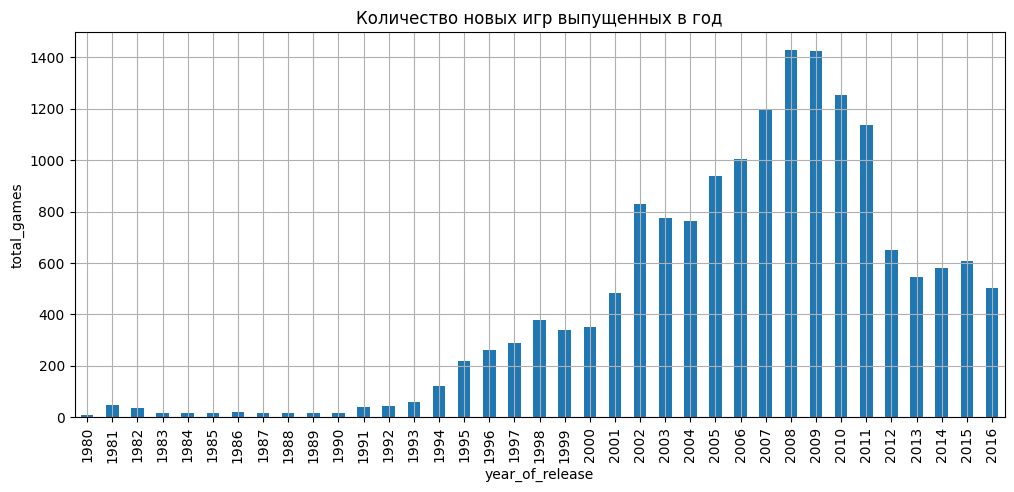

In [28]:
data.query('year_of_release != 0 ').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar', ylabel='total_games', legend=False, title = 'Количество новых игр выпущенных в год' );

По графику видно, что до 2000 года выпускалось очень мало игр (до 350 в год), далее начинается рост и в 2008 и 2009 годах в год выпускается более 1400 игр. Далее идет спад и в период с 2012 по 2016 год в среднем выпускается около 550 игр в год. Далее актуальным периодом мы будем считать период с 2012 года по 2016 год, так как нам нужно сделать прогноз на 2017 год. Более раний период мы брать не будем, так как после 2008 и 2009 года призошел спад.

#### Самые популярные платформы

In [29]:
#посчитаем сколько всего платформ
len(data['platform'].unique())

31

In [30]:
#выберим из них самые популярные , т.е. с самыми большими суммарными продажами
data.pivot_table(index='platform',values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Для анализа будем рассматривать первые 6 платформ, так как после 6 платформы суммарные продажи падают больше чем в 2 раза. Разрыв очень большой.

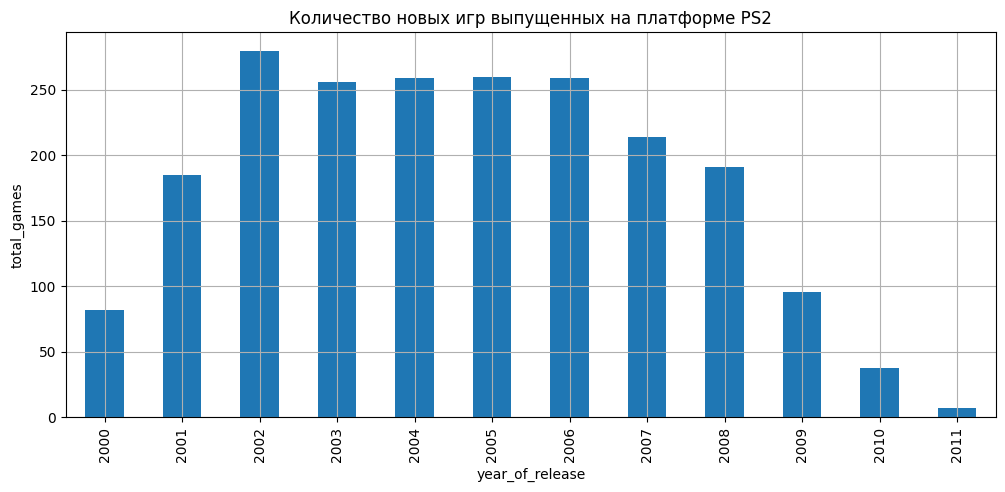

In [31]:
data.query('platform == "PS2" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar', ylabel='total_games', legend = False, title = 'Количество новых игр выпущенных на платформе PS2'  );


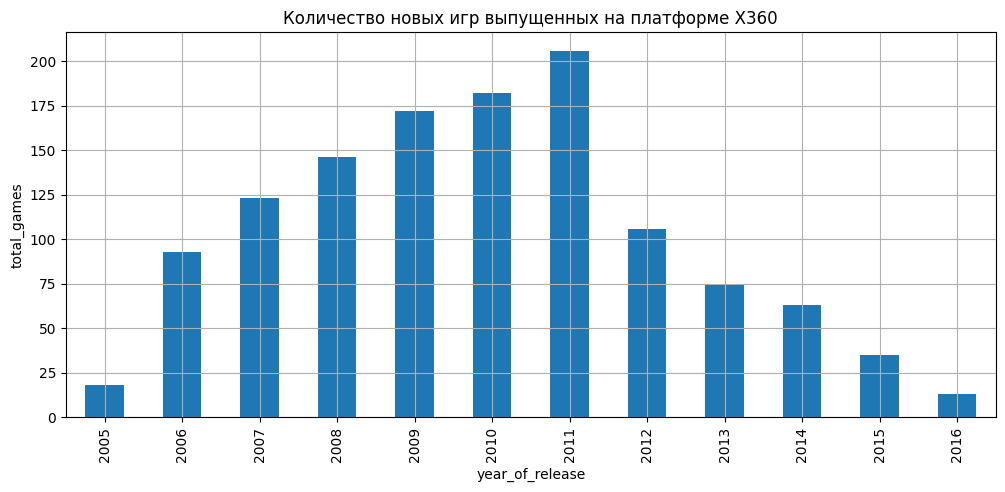

In [32]:
data.query('platform == "X360" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar', ylabel='total_games', legend=False, title = 'Количество новых игр выпущенных на платформе X360'  );

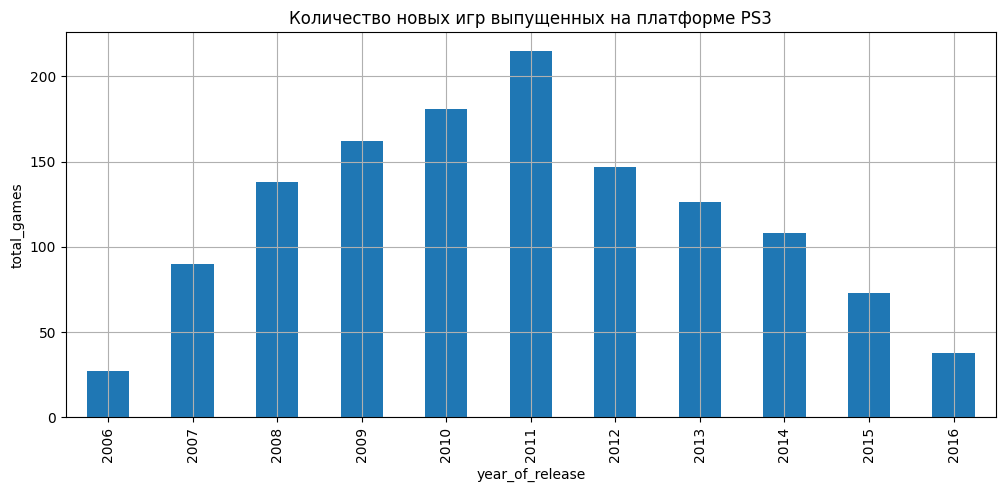

In [33]:
data.query('platform == "PS3" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar', ylabel='total_games', legend=False, title = 'Количество новых игр выпущенных на платформе PS3'  );


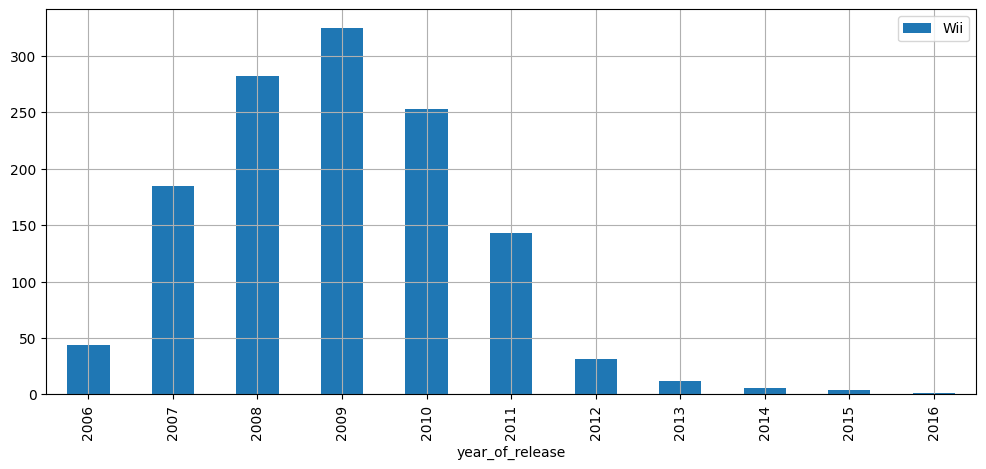

In [34]:
data.query('platform == "Wii" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar',  );
plt.legend(['Wii']);

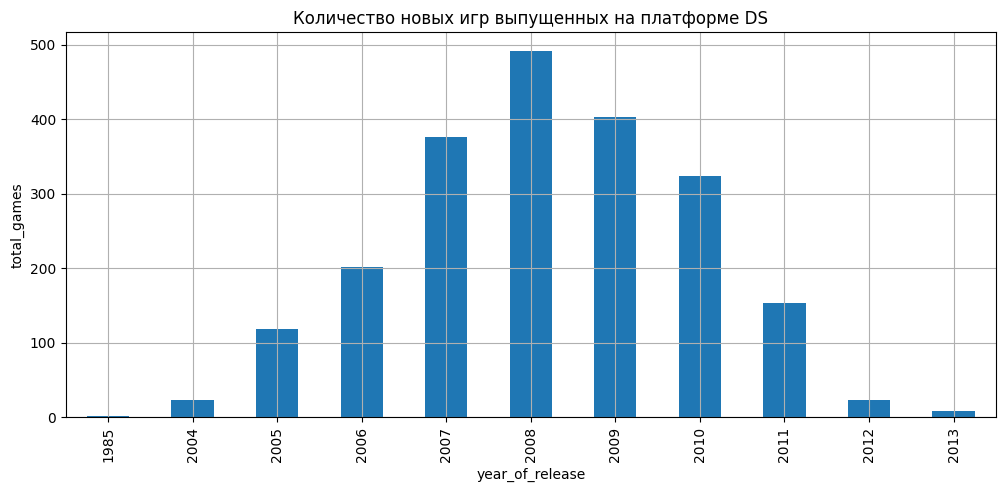

In [35]:
data.query('platform == "DS" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar', ylabel='total_games', legend=False, title = 'Количество новых игр выпущенных на платформе DS'  );

In [36]:
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,OR,0.02


In [37]:
data.drop(labels = [15704],axis = 0, inplace = True)

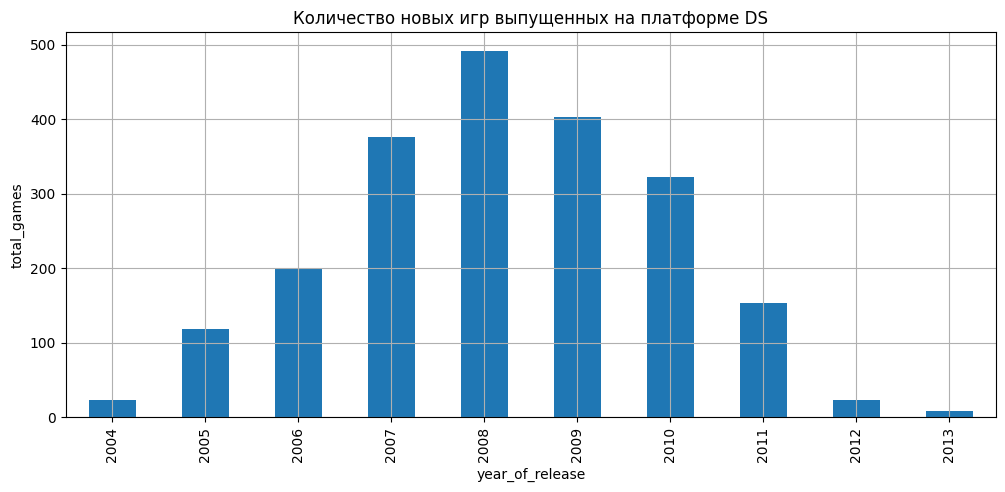

In [38]:
data.query('platform == "DS" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar', ylabel='total_games', legend=False, title = 'Количество новых игр выпущенных на платформе DS'  );

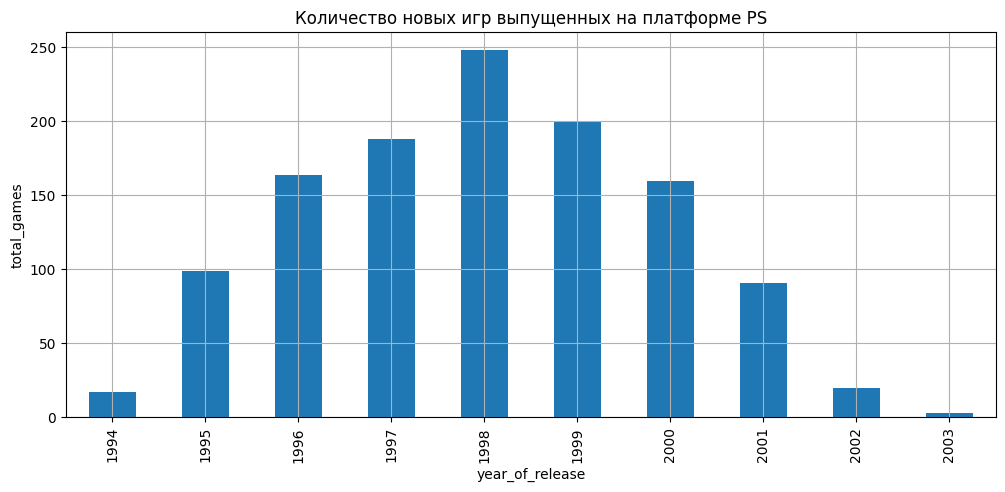

In [39]:
data.query('platform == "PS" and year_of_release != 0').pivot_table(index='year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(12,5), kind='bar',  ylabel='total_games', legend=False, title = 'Количество новых игр выпущенных на платформе PS'  );


По графикам видно, что в среднем популярные площадки существуют 10 лет. В основном, распределение выглядит нормальным. Сначала количество игр, выпускающихся в год, увеличивается, достигается максимум и далее идет спад. Для нашей самой продаваемой платформы после максимума было 4 года с одинаковым количеством выпускаемых игр (около 250 игр). Больше всего игр в год выпускала платформа "DS", около 500. Остальные в самый свой плодотворный год выпускали от 220 до 320 игр. Платформа "Wii" быстро выросла, достигла своего максимума уже на 4 год и быстро за 2 года упала, и далее еще 5 лет выпускала в год не больше 25 игр. А для платформы "X360" после их самого плодотворного года произошел сильный спад, количество игр упало в 2 раза (с 200 до 100). 

#### Анализируем актульный период, найдем потенциально прибыльные платформы

Как было указано ранее: "Далее актуальным периодом мы будем считать период с 2012 года по 2016 год."
    Сохраним в новый датасет данные для актуального периода.

In [40]:
actual_period=data.loc[(data['year_of_release']>2012) & (data['year_of_release']<=2016)]

In [41]:
actual_period.pivot_table(index='platform',values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Лидерами продаж остались несколько платформ, что были в общем датасете, и добавились новые:"PS4","PS3","XOne","3DS" и "X360". Далее построим гистограмы площадок и посмотрим, какие из них идут на спад, а какие могут быть потенциально прибыльными в будущем.

In [42]:
PS4 = actual_period.query('platform == "PS4"').pivot_table(index='year_of_release',values='name', aggfunc='count')
PS3 = actual_period.query('platform == "PS3"').pivot_table(index='year_of_release',values='name', aggfunc='count')
XOne = actual_period.query('platform == "XOne"').pivot_table(index='year_of_release',values='name', aggfunc='count')
z3DS = actual_period.query('platform == "3DS"').pivot_table(index='year_of_release',values='name', aggfunc='count')
X360 = actual_period.query('platform == "X360"').pivot_table(index='year_of_release',values='name', aggfunc='count')

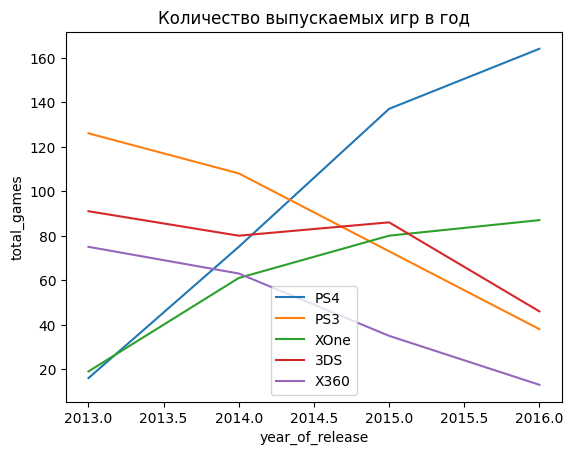

In [43]:
plt.plot( PS4, label='PS4')
plt.plot( PS3, label='PS3')
plt.plot( XOne, label='XOne')
plt.plot( z3DS, label='3DS')
plt.plot( X360, label='X360')
plt.legend();
plt.ylabel("total_games");
plt.xlabel("year_of_release");
plt.title("Количество выпускаемых игр в год");

In [44]:
PS4_2 = actual_period.query('platform == "PS4"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
PS3_2 = actual_period.query('platform == "PS3"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
XOne_2 = actual_period.query('platform == "XOne"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
z3DS_2 = actual_period.query('platform == "3DS"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
X360_2 = actual_period.query('platform == "X360"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')

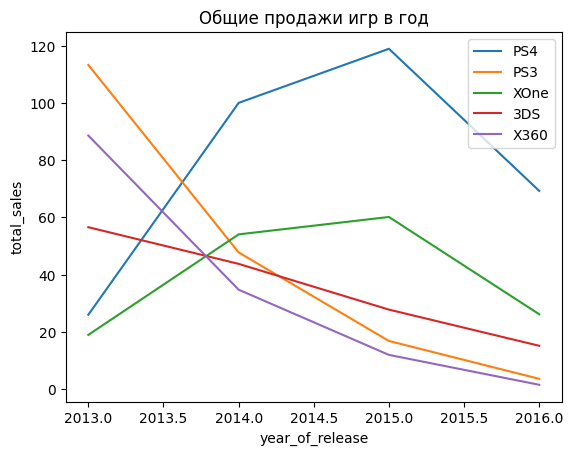

In [45]:
plt.plot( PS4_2, label='PS4')
plt.plot( PS3_2, label='PS3')
plt.plot( XOne_2, label='XOne')
plt.plot( z3DS_2, label='3DS')
plt.plot( X360_2, label='X360')
plt.legend();
plt.ylabel("total_sales");
plt.xlabel("year_of_release");
plt.title("Общие продажи игр в год");

По графику выпускаемых игр в год видно, что платформы PS4 и XOne растут, но по общим продажам начинают падать, это может значить, что еще несколько лет, они могут быть потенциально прибыльными. Платформы PS3, X360 и 3DS хоть я находятся в топе по продажам, но мы видим что оба графика идут на спад, а это значит, что нового скачка не будет.

Займемся следующими по списку платформами. НО проверим эти платформы(WiiU, PC, PSV, Wii, PSP, DS)  на количество данных, возможно есть данные только по одному году.

In [46]:
print ('WiiU:',actual_period.query('platform == "WiiU"')['year_of_release'].unique())
print ('PC:',actual_period.query('platform == "PC"')['year_of_release'].unique())
print ('PSV:',actual_period.query('platform == "PSV"')['year_of_release'].unique())
print ('Wii:',actual_period.query('platform == "Wii"')['year_of_release'].unique())
print ('PSP:',actual_period.query('platform == "PSP"')['year_of_release'].unique())
print ('DS:',actual_period.query('platform == "DS"')['year_of_release'].unique())

WiiU: [2014 2015 2013 2016]
PC: [2014 2013 2015 2016]
PSV: [2014 2013 2015 2016]
Wii: [2013 2014 2015 2016]
PSP: [2013 2014 2015]
DS: [2013]


Платформа DC имеет данные только за 2013 год, а платформа PSP до 2015 года . Это значит, что они уже перестали существовать. Рассмотрим оставшиеся платформы.

In [47]:
WiiU = actual_period.query('platform == "WiiU"').pivot_table(index='year_of_release',values='name', aggfunc='count')
PC = actual_period.query('platform == "PC"').pivot_table(index='year_of_release',values='name', aggfunc='count')
PSV = actual_period.query('platform == "PSV"').pivot_table(index='year_of_release',values='name', aggfunc='count')
Wii = actual_period.query('platform == "Wii"').pivot_table(index='year_of_release',values='name', aggfunc='count')

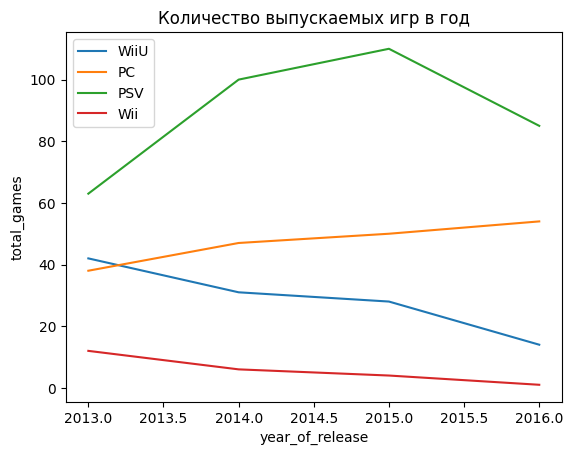

In [48]:
plt.plot( WiiU, label='WiiU')
plt.plot( PC, label='PC')
plt.plot( PSV, label='PSV')
plt.plot( Wii, label='Wii')
plt.legend();
plt.ylabel("total_games");
plt.xlabel("year_of_release");
plt.title("Количество выпускаемых игр в год");

In [49]:
WiiU_2 = actual_period.query('platform == "WiiU"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
PC_2 = actual_period.query('platform == "PC"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
PSV_2 = actual_period.query('platform == "PSV"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')
Wii_2 = actual_period.query('platform == "Wii"').pivot_table(index='year_of_release',values='total_sales', aggfunc='sum')


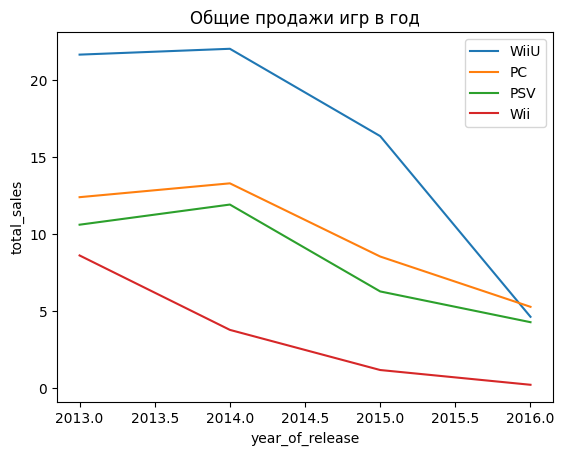

In [50]:
plt.plot( WiiU_2, label='WiiU')
plt.plot( PC_2, label='PC')
plt.plot( PSV_2, label='PSV')
plt.plot( Wii_2, label='Wii')
plt.legend();
plt.ylabel("total_sales");
plt.xlabel("year_of_release");
plt.title("Общие продажи игр в год");

По первому графику видно, что платформа PC увеличивает количество продаваемых в год игр, остальные идут на спад. По второму графику видно, что у всех платформы падают продажи.

По нашим данным, можно сделать вывод, что потенциально прибыльными платформами могут быть : PS4,  XOne и PC.

#### Анализируем потенциально прибыльные платформы

In [51]:
#сохраним в датасет данные только по потенциально прибыльным платформам
profit_platforms=actual_period.query('platform == "PS4" or platform == "XOne" or platform == "PC"')

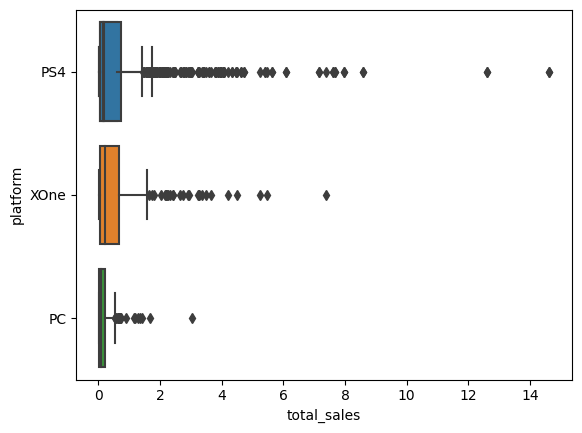

In [52]:
#строим ящик с усами сразу для всех платформ
sns.boxplot(x=profit_platforms["total_sales"])
sns.boxplot(data=profit_platforms, x="total_sales", y="platform");

Есть несколько выбросов, поэтому чтобы посмотреть поближе сам "ящик" увеличим массштаб.

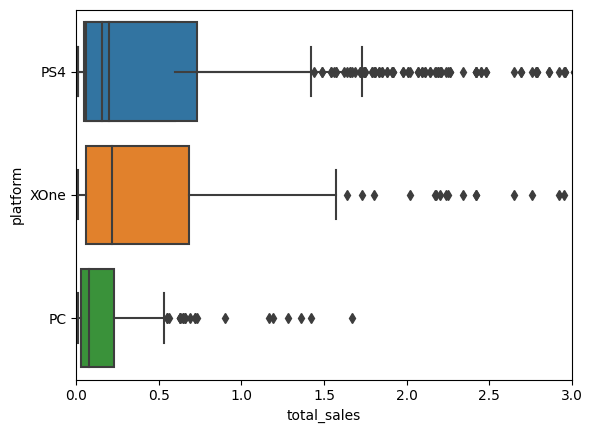

In [53]:
sns.boxplot(x=profit_platforms["total_sales"])
sns.boxplot(data=profit_platforms, x="total_sales", y="platform")
plt.xlim(0,3);

Заметим, что большая часть значений для всех площадок лежит в диапазоне до 1 миллиона. Для площадок PS4 и XOne медианы почти совпадают (0,2 м), для PC медиана немного меньше (0,1 м). То же происходит с "усом" этой площадки. Его значение почти ровняется 0,5 миллионам, для PS4 это число ровняется 1,3 миллиона, для XOne - чуть больше 1,5 миллиона. При этом выбросов для площадки PS4 сильно больше,чем для двух других, так как у двух других после "уса" видно лишь отдельные точки, а для PS4 происходит слияние. 

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

##### Платформа XOne

Возьмем платформу XOne и проверим как на продажи влияют отзывы пользователей и критиков.

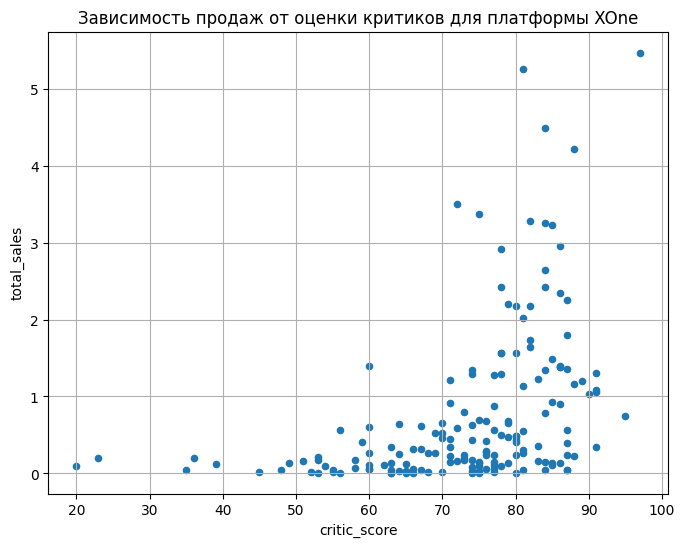

In [54]:
profit_platforms.query('platform == "XOne" ').plot(x='critic_score', y= 'total_sales', kind='scatter',\
figsize=(8,6), sharex=False, grid=True, title='Зависимость продаж от оценки критиков для платформы XOne');

In [55]:
profit_platforms.query('platform == "XOne"')['critic_score'].corr(profit_platforms.query('platform == "XOne"')['total_sales'])

0.4169983280084016

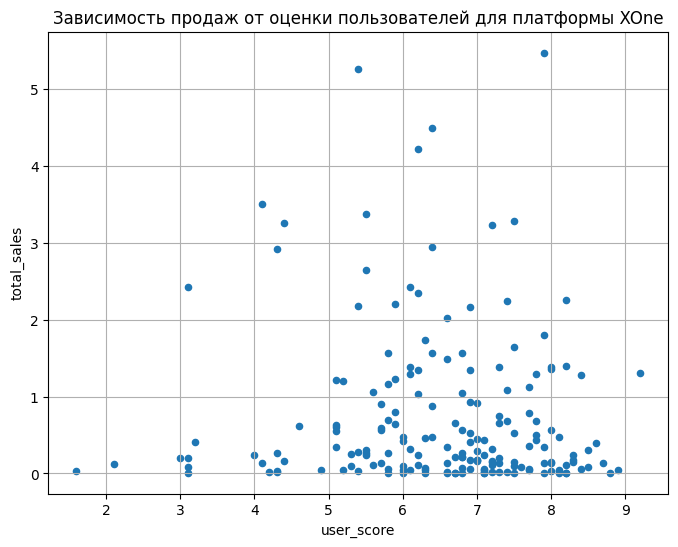

In [56]:
profit_platforms.query('platform == "XOne" and user_score<20').plot(x='user_score', y= 'total_sales', kind='scatter',\
   figsize=(8,6), sharex=False, grid=True, title='Зависимость продаж от оценки пользователей для платформы XOne');

In [57]:
profit_platforms.query('platform == "XOne" and user_score<20')['user_score'].corr(profit_platforms.query('platform == "XOne" and user_score<20')['total_sales'])

-0.06892505328279419

По данным диаграммам рассеивания и коэффициентам коррелляции можно сделать вывод что зависимости между оценкой пользователя и продажами практически нет. Но присутсвует слабая зависимость между продажами и оценкой критиков, так как коэфициент корреляции равен 0,4. Проверим это на других платформах. 

##### Платформа PS4

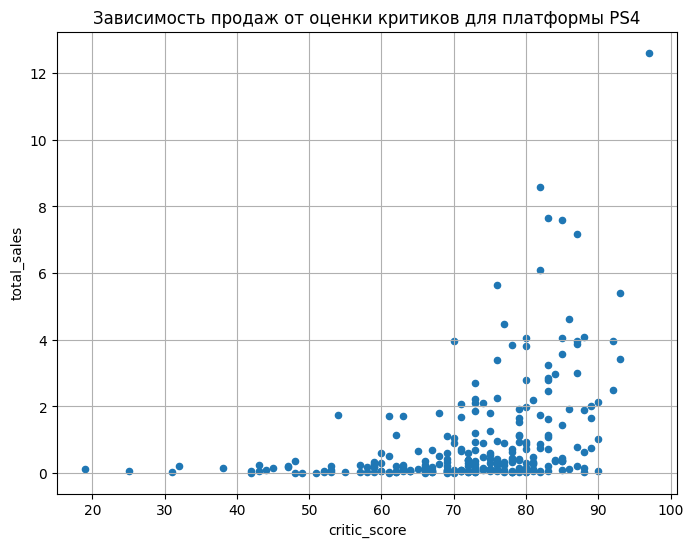

In [58]:
profit_platforms.query('platform == "PS4" ').plot(x='critic_score', y= 'total_sales', kind='scatter',\
    figsize=(8,6), sharex=False, grid=True, title='Зависимость продаж от оценки критиков для платформы PS4');

In [59]:
profit_platforms.query('platform == "PS4"')['critic_score'].corr(profit_platforms.query('platform == "PS4"')['total_sales'])

0.4065679020617815

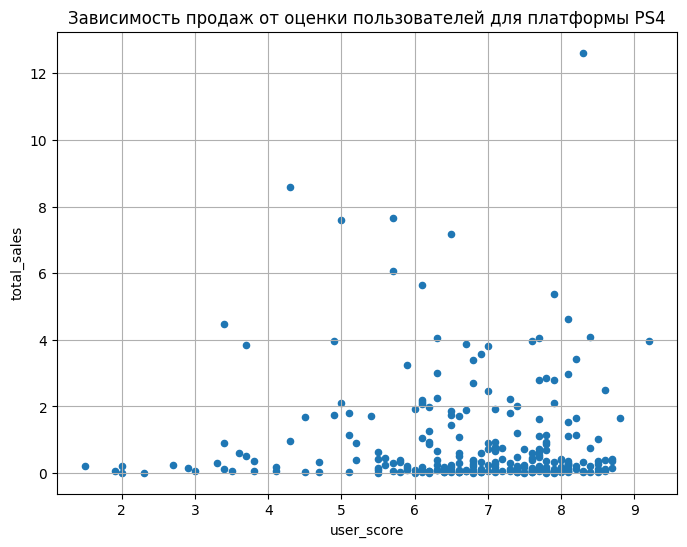

In [60]:
profit_platforms.query('platform == "PS4" and user_score<20').plot(x='user_score', y= 'total_sales', kind='scatter',\
            figsize=(8,6), sharex=False, grid=True, title='Зависимость продаж от оценки пользователей для платформы PS4');

In [61]:
profit_platforms.query('platform == "PS4" and user_score<20')['user_score'].corr(profit_platforms.query('platform == "PS4" and user_score<20')['total_sales'])

-0.031957110204556466

##### Платформа PC

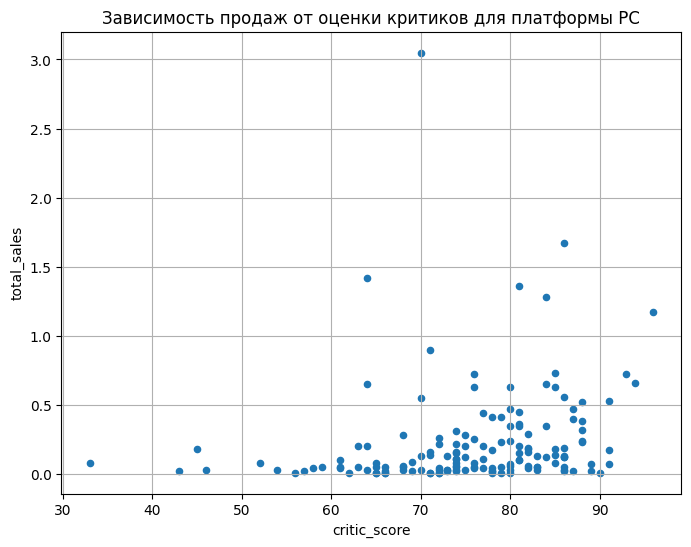

In [62]:
profit_platforms.query('platform == "PC" ').plot(x='critic_score', y= 'total_sales', kind='scatter',\
            figsize=(8,6), sharex=False, grid=True, title='Зависимость продаж от оценки критиков для платформы PC');

In [63]:
profit_platforms.query('platform == "PC"')['critic_score'].corr(profit_platforms.query('platform == "PC"')['total_sales'])

0.1960302829436937

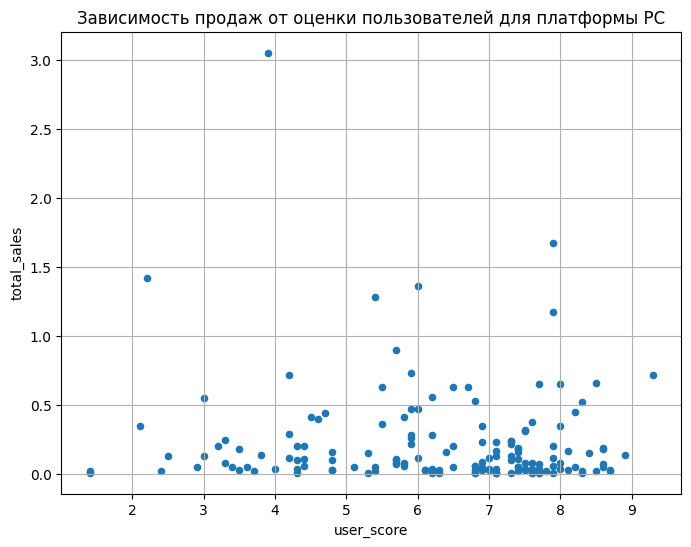

In [64]:
profit_platforms.query('platform == "PC" and user_score<20').plot(x='user_score', y= 'total_sales', kind='scatter',\
                  figsize=(8,6), sharex=False, grid=True, title='Зависимость продаж от оценки пользователей для платформы PC');

In [65]:
profit_platforms.query('platform == "PC" and user_score<20')['user_score'].corr(profit_platforms.query('platform == "PC" and user_score<20')['total_sales'])

-0.09384186952476745

Для всех платформ практически нет зависимости между оценками пользователя и продажами, но существует слабая связь между оценками критиков и продажами.

#### Жанры и продажи

In [66]:
profit_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,OR,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,OR,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16372,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16374,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,OR,0.01
16389,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,OR,0.01
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,20.0,M,0.01


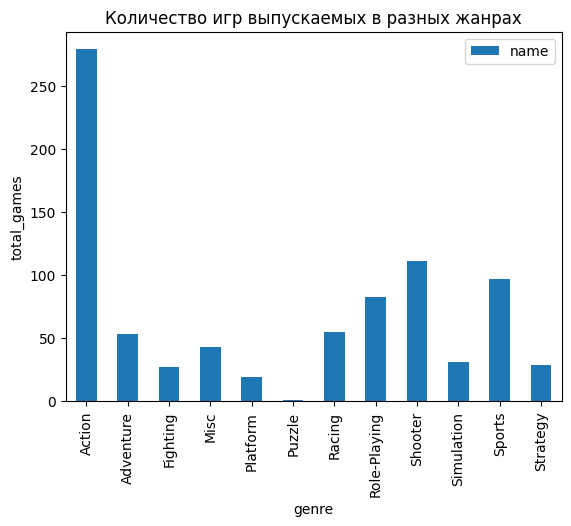

In [67]:
profit_platforms.pivot_table(index='genre',values='name', aggfunc='count').plot(kind='bar',ylabel='total_games',\
                                                                                title='Количество игр выпускаемых в разных жанрах');

Популярные платформы, больше всего выпускают игр с жанром 'Action' (около 260). Далее по количеству выпускаемых игр идут жанры 'Sports' и 'Shooter'(около 100). Меньше всего выпускается игр жанра 'Puzzle'. 

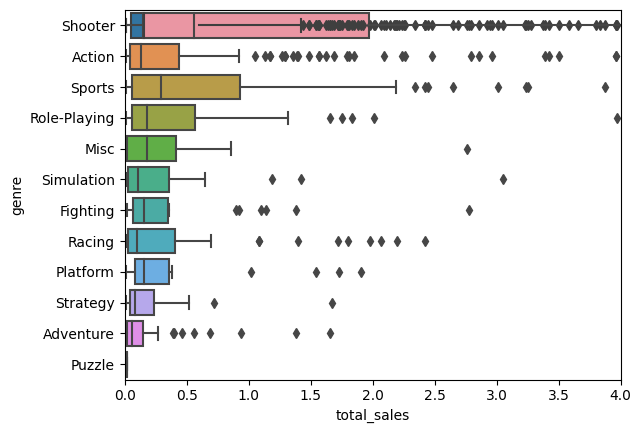

In [68]:
sns.boxplot(x=profit_platforms["total_sales"])
sns.boxplot(data=profit_platforms, x="total_sales", y="genre");
plt.xlim(0,4);

По "ящикам" видно, что самая большая медиана у жанра shooter (0,5 м), это значит что этот жанр самый прибыльный. Далее идет Sports (0,25 м) и далее на одном уровне Role-Playing и Misc (0.2 м). Жанр который выпускается больше всего, а именно Action вообще не входит в топ-5 прибыльных жанров. Самый не прибыльный жанр это Puzzle, поэтому и выпускают игр этого жанра мало.

### Составяем портрет пользователя каждого региона


#### Самые популярные платформы (топ-5) для каждого региона.

In [69]:
actual_period.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Для Северной Америки популярными стали платформы : PS4, XOne, X360, PS3 и 3DS. 

In [70]:
actual_period.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Для Европы популярными стали те же платформы, что и для Северной Америки, только в другом порядке. 

In [71]:
actual_period.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Для Японии популярными стали платформы : 3DS, PS3, PSV, PS4, WiiU. В топ вошли несколько платформ, которые не входили в топ в Северной Америке и Европе.

In [72]:
print(actual_period.pivot_table(index='platform',values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head().sum())
print(actual_period.pivot_table(index='platform',values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head().sum())
print (actual_period.pivot_table(index='platform',values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head().sum())

na_sales    385.22
dtype: float64
eu_sales    333.97
dtype: float64
jp_sales    136.59
dtype: float64


У Северной Америки и Европы одинаковые платформы в топе, но продажи в СА в 2 раза больше чем, в Европе по платформам XOne и X360, в 1,3 раза больше по платформе 3DS, но в Европе в 1,2 раза больше продаж по платформам PS4 и PS3.

Япония сильно отличается от Европы и Америки. Если смотреть по тем же площадкам, то 3DS Япония закупает в 3 раза больше, PS3- в 3 раза меньше, а PS4 в 9 раз меньше чем Европа. И в целом, Япония меньше примерно в 2,4 раза закупаем игр чем Европа и в 2,8 раза чем Северная Америка.

#### Самые популярные жанры (топ-5) для каждого региона.

In [73]:
actual_period.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [74]:
actual_period.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [75]:
actual_period.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


В Северной Америке и Европе топ 5 жанров состоит из : 'Action', 'Shooter', 'Sports', Role-Playing и  'Misc'- для америки и 'Racing' - для Европы. Для Японии же в топ вошли: 'Role-Playing','Action','Misc','Fighting' и  'Shooter'. В топе Японии нет Спортивных игр, но появляются Борьба.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

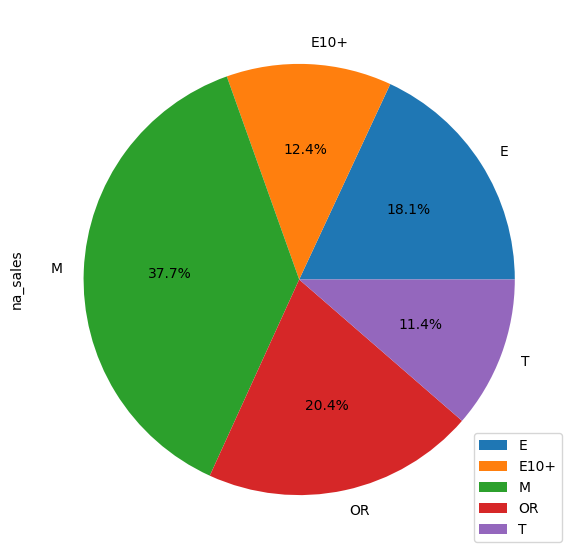

In [76]:
actual_period.pivot_table(index='rating',values='na_sales', aggfunc='sum')\
.plot(kind='pie',y='na_sales', figsize=(7,7),autopct='%1.1f%%');

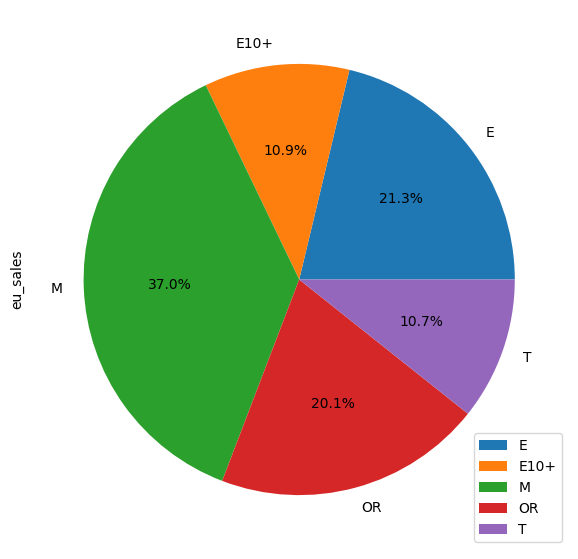

In [77]:
actual_period.pivot_table(index='rating',values='eu_sales', aggfunc='sum')\
.plot(kind='pie',y='eu_sales',figsize=(7,7), autopct='%1.1f%%');

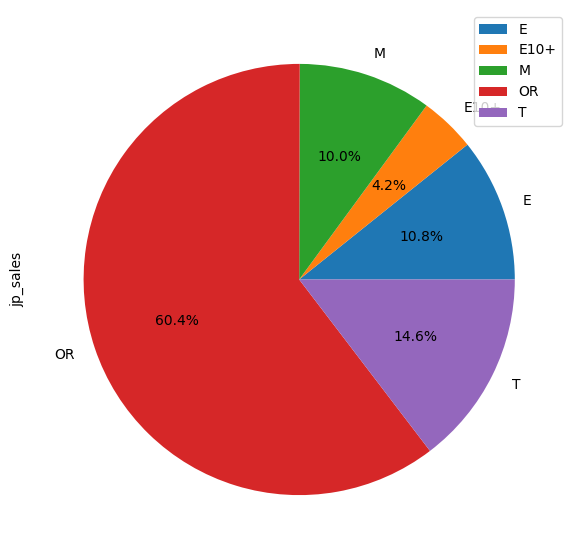

In [78]:
actual_period.pivot_table(index='rating',values='jp_sales', aggfunc='sum')\
.plot(kind='pie',y='jp_sales',figsize=(7,7), autopct='%1.1f%%');

Во всех регионах в топ входят одни и те же категории: M,E,T, E10+ и OR (так мы обозначили категорию игр, у которых был пропуск в столбце  rating, т.е. это рейтинг ESRB и он предназначен для маркировки игр только в США, Канаде и Мексике). Для Северной Америки и Европы их процентное соотношение практически одинаковое, но для Японии категория OR увеличивается в 3 раза (60 % всех игр), категория T на несколько процентов тоже, остальные категории падают в 2 (E),3(E10+)  и в 4 (M) раза.

### Проверяем гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки этой гипотезы, нужно воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Метод stats.ttest_ind

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны;

Альтернативня гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны;

In [79]:
#сохраняем столбец user_score для платформ Xbox One и PC

XOne =  actual_period.query('platform == "XOne" and user_score < 20')['user_score']
PC = actual_period.query('platform=="PC" and user_score <20')['user_score']
print ('Среднее значение пользовательской оценки для XOne', XOne.mean())
print ('Среднее значение пользовательской оценки для PC', PC.mean())
alpha=0.05 

result=st.ttest_ind(XOne,PC)

print ('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print ('Не получилось отвергнуть нулевую гипотезу')

Среднее значение пользовательской оценки для XOne 6.521428571428572
Среднее значение пользовательской оценки для PC 6.2696774193548395
p-значение 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Это значит что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action  и Sports разные.

Для проверки этой гипотезы, нужно воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Метод stats.ttest_ind

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action  и Sports равны;

Альтернативня гипотеза: Средние пользовательские рейтинги жанров Action  и Sports не равны;

In [80]:
#сохраняем столбец user_score для жанров Action и Sports

Action =  actual_period.query('genre == "Action" and user_score < 20')['user_score']
Sports = actual_period.query('genre=="Sports" and user_score <20')['user_score']

print ('Среднее значение пользовательской оценки для Action', Action.mean())
print ('Среднее значение пользовательской оценки для Sports', Sports.mean())

alpha=0.05 

result=st.ttest_ind(Action,Sports)

print ('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print ('Не получилось отвергнуть нулевую гипотезу')

Среднее значение пользовательской оценки для Action 6.837532133676092
Среднее значение пользовательской оценки для Sports 5.238124999999999
p-значение 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Это значит что средние пользовательские рейтинги жанров Action  и Sports разные.


### Вывод

В ходе работы был выполнен иследовательский анализ о продажах игр, оценках пользователей и критиков, а так же анализ игровых жанров и платформ. Были составлены портреты пользователей для Северной Америки, Европы и Японии. Было выявлено, сколько игр выпускается каждый год. Было изучено сколько в среднем существует платформа, самые популярные и потенциально прибыльные платформы. Так же мы изучили, есть ли зависимость между оценкой пользователя или критика и продажами. Были изученны жанры игр, какие из них самые популярные, как в целом в мире, так и для отдельные регионов. И на основе этого анализа были проверены две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action  и Sports разные.

Было выявлено, что:
1. До 2000 года выпускалось очень мало игр (до 350 в год), далее начинался рост и в 2008 и 2009 годах и в год выпускается более 1400 игр, далее шел спад и в период с 2012 по 2016 год в среднем выпускалось около 550 игр в год;
2. Потенциально прибыльные платформы:
* __PS4__ (314 миллиона проданных копий за актуальный период); 
* __XOne__ (159 миллиона проданных копий за актуальный период); 
* __PC__  (39 миллиона проданных копий за актуальный период); 
3. Зависимость между отзывами пользователей и продажами игр отсутствует, так как коэффициент корреляции составил примерно -0.06. Зависимость между отзывами критиков и продажами существует, так как коэффициент корреляции составил примерно 0.4, но очень слабая связь есть между положительными оценками и увеличением продаж;
4. Больше всего выпускается игр с жанром __'Action'__ (около 260), далее идут __'Sports'__ и __'Shooter'__ (около 100 миллионов). Меньше всего выпускается игр жанра __'Puzzle'__. Самый прибыльный жанр __'Shooter'__ , далее по прибыльности __'Sports'__,  жанры __'Role-Playing'__ и __'Misc'__ практически на ровне, меньше всего продаж у игр с жанром __'Puzzle'__.


По оценке пользователей разных регионов, можно сделать следующие выводы:
1. Для Северной Америки и Европы популярными стали платформы :__PS4__, __XOne__, __X360__, __PS3__ и __3DS__ . Для Японии популярными стали платформы: __3DS__, __PS3__, __PSV__, __PS4__, __WiiU__. В топ вошли несколько платформ, которые не входили в топ в Северной Америке и Европе.
2. Хотя у Северной Америки и Европы одинаковые платформы в топе, но продажи в СА в 2 раза больше чем, в Европе по платформам __XOne__ и __X360__, в 1,3 раза больше по платформе __3DS__, но в Европе в 1,2 раза больше продаж по платформам __PS4__ и __PS3__. Япония сильно отличается от Европы и Америки. Если смотреть по тем же площадкам, то __3DS__ Япония закупает в 3 раза больше, __PS3__- в 3 раза меньше, а __PS4__ - в 9 раз меньше чем Европа. И в целом, Япония меньше примерно в 2,4 раза закупаем игр чем Европа и в 2,8 раза чем Северная Америка. 
3. В Северной Америке и Европе топ 5 жанров состоит из : __'Action', 'Shooter', 'Sports', Role-Playing и  'Misc'__- для америки и __'Racing'__ - для Европы. Для Японии же в топ вошли: __'Role-Playing','Action','Misc','Fighting' и  'Shooter'__. В топе Японии нет Спортивных игр, но появляются Борьба.
4. Во всех регионах в топ входят одни и те же категории: __M,E,T, E10+ и OR__ (так мы обозначили категорию игр, у которых был пропуск в столбце  rating, т.е. это рейтинг ESRB и он предназначен для маркировки игр только в США, Канаде и Мексике). Для Северной Америки и Европы их процентное соотношение практически одинаковое, но для Японии категория __OR__ увеличивается в 3 раза (60 % всех игр), категория __T__ на несколько процентов тоже, остальные категории падают в 2 __(E)__,3 __(E10+)__  и в 4 __(M)__ раза.

После анализа, мы проверили две гипотезы и удалось выяснить что:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action  и Sports разные.
